In [9]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import tqdm as tqdm
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import time
from collections import deque
import numpy as np
# rom openai import OpenAI
import ast

In [2]:
def load_checkpoint(filename):
    if os.path.exists(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)
    return None

In [3]:
data_cleaned = load_checkpoint('data_final_cleaned_depth_2_v2.pkl')
graph_cleaned = data_cleaned['graph']
node_attributes = data_cleaned['node_attributes']
G = nx.Graph(graph_cleaned)
# add the node attributes from your dictionary
nx.set_node_attributes(G, node_attributes)

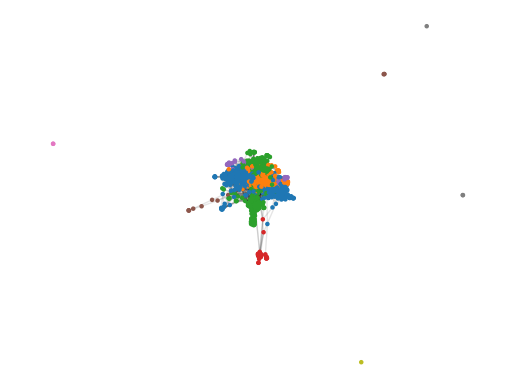

In [15]:
import networkx.algorithms.community as nx_comm
import forceatlas2


pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(G))
pos_subgraph = {node: pos_array[i] for i, node in enumerate(G.nodes())}

sorted_communities = sorted(nx_comm.louvain_communities(G), key=len, reverse=True)
top_n = len(sorted_communities)

node_to_community = {}
for i, comm in enumerate(sorted_communities):
    for node in comm:
        node_to_community[node] = i


top_n += 1
cmap = plt.colormaps.get_cmap('tab10')
colors = [cmap(i / top_n) for i in range(top_n)]

node_colors = []
for node in G.nodes():
    community_index = node_to_community.get(node, -1)
    if community_index != -1 and community_index <= top_n:
        node_colors.append(colors[community_index])
    else:
        node_colors.append('lightgray')

nx.draw_networkx_edges(G, pos_subgraph, alpha=0.1)
nx.draw_networkx_nodes(G, pos_subgraph, node_color=node_colors, node_size=5)
plt.axis('off')

plt.show()